# Esercizi Scikit-learn: Guida Pratica Completa

Questa collezione di esercizi copre tutti i metodi e concetti presentati nella lezione di scikit-learn. Gli esercizi sono organizzati per modulo e difficoltà crescente.

## 1. sklearn.datasets: Caricamento e Generazione di Dataset

### Esercizio 1.1 (Base): Esplorazione Dataset Integrati
Carica il dataset Wine e analizza le sue caratteristiche principali.

In [ ]:
# Esercizio 1.1: Carica il dataset Wine e rispondi alle seguenti domande:
# 1. Quanti campioni e feature contiene?
# 2. Quante classi ci sono?
# 3. Quali sono i nomi delle feature?
# 4. Visualizza le prime 3 righe dei dati

from sklearn.datasets import load_wine
import numpy as np

# Scrivi il tuo codice qui
wine = load_wine()
print("Numero di campioni:", wine.data.shape[0])
print("Numero di feature:", wine.data.shape[1])
print("Numero di classi:", len(np.unique(wine.target)))
print("Nomi delle feature:", wine.feature_names)
print("Prime 3 righe:")
print(wine.data[:3])

### Esercizio 1.2 (Intermedio): Generazione Dataset Personalizzato
Crea un dataset sintetico per un problema di classificazione con specifiche caratteristiche.

In [ ]:
# Esercizio 1.2: Genera un dataset di classificazione con:
# - 500 campioni
# - 8 feature totali (4 informative, 2 ridondanti)
# - 3 classi
# - 2 cluster per classe
# Poi visualizza le statistiche di base del dataset creato

from sklearn.datasets import make_classification
import numpy as np

# Scrivi il tuo codice qui
X, y = make_classification(n_samples=500, n_features=8, n_informative=4, 
                           n_redundant=2, n_clusters_per_class=2, 
                           n_classes=3, random_state=42)
print("Shape del dataset:", X.shape)
print("Distribuzione delle classi:", np.bincount(y))
print("Media delle feature:", X.mean(axis=0))

### Esercizio 1.3 (Avanzato): Confronto Dataset Reali vs Sintetici
Confronta le caratteristiche del dataset Diabetes con un dataset sintetico di regressione.

In [ ]:
# Esercizio 1.3: 
# 1. Carica il dataset Diabetes
# 2. Crea un dataset sintetico di regressione con le stesse dimensioni
# 3. Confronta le statistiche (media, std, range) delle feature

from sklearn.datasets import load_diabetes, make_regression

# Dataset reale
diabetes = load_diabetes()
X_real, y_real = diabetes.data, diabetes.target

# Dataset sintetico
X_synthetic, y_synthetic = make_regression(n_samples=X_real.shape[0], 
                                           n_features=X_real.shape[1], 
                                           noise=0.1, random_state=42)

# Confronta le statistiche
print("Dataset Reale - Media feature:", X_real.mean(axis=0))
print("Dataset Sintetico - Media feature:", X_synthetic.mean(axis=0))
print("Dataset Reale - Std feature:", X_real.std(axis=0))
print("Dataset Sintetico - Std feature:", X_synthetic.std(axis=0))

## 2. sklearn.preprocessing: Preprocessing dei Dati

### Esercizio 2.1 (Base): Scalatura Dati
Applica diverse tecniche di scalatura sui dati del Wine dataset.

In [ ]:
# Esercizio 2.1: Applica StandardScaler e MinMaxScaler al dataset Wine
# Confronta i risultati mostrando media e deviazione standard prima e dopo

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data

# Dati originali
print("Dati originali:")
print("Media:", X.mean(axis=0))
print("Std:", X.std(axis=0))

# StandardScaler
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)
print("\nDopo StandardScaler:")
print("Media:", X_std.mean(axis=0))
print("Std:", X_std.std(axis=0))

# MinMaxScaler  
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)
print("\nDopo MinMaxScaler:")
print("Min:", X_minmax.min(axis=0))
print("Max:", X_minmax.max(axis=0))
print("std: ", X_minmax.std(axis=0)) 

### Esercizio 2.2 (Intermedio): Gestione Dati Mancanti
Crea e gestisci un dataset con valori mancanti usando diverse strategie di imputazione.

In [ ]:
# Esercizio 2.2: 
# 1. Crea un array con valori mancanti (NaN) in posizioni casuali
# 2. Applica SimpleImputer con strategie: 'mean', 'median', 'most_frequent'
# 3. Confronta i risultati

import numpy as np
from sklearn.impute import SimpleImputer

# Crea dati con valori mancanti
np.random.seed(10)
data = np.random.randn(10, 3)
# Inserisci NaN casualmente
missing_indices = np.random.choice(10, size=5, replace=False)
print(missing_indices)
data[missing_indices] = np.nan

print("Dati con valori mancanti:")
print(data)

# Applica diverse strategie di imputazione
strategies = ['mean', 'median', 'most_frequent']
for strategy in strategies:
    imputer = SimpleImputer(strategy=strategy)
    data_imputed = imputer.fit_transform(data)
    print(f"\nDopo imputazione con {strategy}:")
    print(data_imputed)

### Esercizio 2.3 (Avanzato): Pipeline di Preprocessing Completa
Crea una pipeline completa di preprocessing per un dataset misto (numerico e categorico).

In [ ]:
# Esercizio 2.3: Crea un dataset misto e applica preprocessing completo
# 1. Crea dati numerici e categorici
# 2. Gestisci valori mancanti
# 3. Scala i dati numerici
# 4. Codifica i dati categorici
# 5. Combina tutto in un'unica pipeline

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Crea un dataset misto
data = {
    'feature1': [1, 2, np.nan, 4, 5],
    'feature2': [10, 20, 30, np.nan, 50],
    'category': ['A', 'B', 'A', 'C', 'B']
}
df = pd.DataFrame(data)

# Identifica colonne numeriche e categoriche
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Crea preprocessor
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Applica preprocessing
X_processed = preprocessor.fit_transform(df)
print("Dati processati shape:", X_processed.shape)
print("Dati processati:")
print(X_processed)

## 3. sklearn.model_selection: Suddivisione Dati e Validazione

### Esercizio 3.1 (Base): Suddivisione Dati
Pratica la suddivisione dei dati con diverse proporzioni e analizza l'impatto.

In [ ]:
# Esercizio 3.1: Usa il dataset Iris per sperimentare diverse suddivisioni
# Testa: 80-20, 70-30, 60-40 e osserva come cambia la distribuzione delle classi

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()
X, y = iris.data, iris.target

test_sizes = [0.2, 0.3, 0.4]

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    print(f"\nTest size: {test_size}")
    print(f"Training set: {len(X_train)} campioni")
    print(f"Test set: {len(X_test)} campioni")
    print(f"Distribuzione classi training: {np.bincount(y_train)}")
    print(f"Distribuzione classi test: {np.bincount(y_test)}")

### Esercizio 3.2 (Intermedio): Validazione Incrociata
Implementa diverse strategie di cross-validation e confronta i risultati.

In [ ]:
# Esercizio 3.2: Applica cross-validation con diversi fold (3, 5, 10) 
# su un classificatore SVM usando il dataset Wine
# Confronta accuracy media e deviazione standard

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_wine

wine = load_wine()
X, y = wine.data, wine.target

model = SVC(random_state=42)
cv_folds = [3, 5, 10]

for cv in cv_folds:
    scores = cross_val_score(model, X, y, cv=cv)
    print(f"\nCV con {cv} fold:")
    print(f"Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")
    print(f"Scores individuali: {scores}")

# Bonus: usa StratifiedKFold per mantenere le proporzioni delle classi
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
stratified_scores = cross_val_score(model, X, y, cv=skf)
print(f"\nStratified CV:")
print(f"Accuracy: {stratified_scores.mean():.3f}")

### Esercizio 3.3 (Avanzato): Ottimizzazione Iperparametri
Confronta GridSearchCV e RandomizedSearchCV per ottimizzare un Random Forest.

In [ ]:
# Esercizio 3.3: Ottimizza un Random Forest usando entrambi i metodi
# Confronta tempi di esecuzione e risultati ottenuti

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
import time

# Usa dataset digits per avere più complessità
digits = load_digits()
X, y = digits.data, digits.target

# Definisci spazio dei parametri
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

# Grid Search
start_time = time.time()
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X, y)
grid_time = time.time() - start_time

# Random Search  
start_time = time.time()
random_search = RandomizedSearchCV(rf, param_grid, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X, y)
random_time = time.time() - start_time

print("Grid Search:")
print(f"Miglior score: {grid_search.best_score_:.3f}")
print(f"Migliori parametri: {grid_search.best_params_}")
print(f"Tempo: {grid_time:.2f} secondi")

print("\nRandom Search:")
print(f"Miglior score: {random_search.best_score_:.3f}")
print(f"Migliori parametri: {random_search.best_params_}")
print(f"Tempo: {random_time:.2f} secondi")

## 4. sklearn.decomposition: Riduzione Dimensionalità

### Esercizio 4.1 (Base): PCA Base
Applica PCA per ridurre la dimensionalità e visualizza la varianza spiegata.

In [ ]:
# Esercizio 4.1: Applica PCA al dataset Digits
# 1. Riduci da 64 a 10 componenti
# 2. Visualizza la varianza spiegata cumulativa
# 3. Determina quante componenti servono per spiegare il 95% della varianza

from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data

print(f"Dimensioni originali: {X.shape}")

# Applica PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

print(f"Dimensioni dopo PCA: {X_pca.shape}")
print(f"Varianza spiegata per componente: {pca.explained_variance_ratio_}")
print(f"Varianza spiegata totale: {pca.explained_variance_ratio_.sum():.3f}")

# Trova numero di componenti per 95% varianza
cumsum_variance = pca.explained_variance_ratio_.cumsum()
n_components_95 = np.argmax(cumsum_variance >= 0.95) + 1
print(f"Componenti per 95% varianza: {n_components_95}")

# Visualizza varianza cumulativa
plt.plot(range(1, len(cumsum_variance) + 1), cumsum_variance)
plt.axhline(y=0.95, color='r', linestyle='--', label='95%')
plt.xlabel('Numero di Componenti')
plt.ylabel('Varianza Spiegata Cumulativa')
plt.legend()
plt.title('Varianza Spiegata Cumulativa PCA')
plt.show()

### Esercizio 4.2 (Intermedio): Confronto Tecniche di Decomposizione
Confronta PCA, ICA e NMF sullo stesso dataset.

In [ ]:
# Esercizio 4.2: Confronta PCA, FastICA e NMF sul dataset Olivetti Faces
# Usa 10 componenti per tutti e confronta la ricostruzione

from sklearn.decomposition import PCA, FastICA, NMF
from sklearn.datasets import fetch_olivetti_faces

# Carica dataset faces (assicurati che sia disponibile)
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
X = faces.data

print(f"Dataset shape: {X.shape}")

n_components = 10

# PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
X_pca_reconstructed = pca.inverse_transform(X_pca)

# ICA
ica = FastICA(n_components=n_components, random_state=42)
X_ica = ica.fit_transform(X)
X_ica_reconstructed = ica.inverse_transform(X_ica)

# NMF (solo per dati non negativi)
nmf = NMF(n_components=n_components, random_state=42)
X_nmf = nmf.fit_transform(X)
X_nmf_reconstructed = nmf.inverse_transform(X_nmf)

# Calcola errore di ricostruzione (MSE)
from sklearn.metrics import mean_squared_error

mse_pca = mean_squared_error(X, X_pca_reconstructed)
mse_ica = mean_squared_error(X, X_ica_reconstructed)
mse_nmf = mean_squared_error(X, X_nmf_reconstructed)

print(f"MSE ricostruzione PCA: {mse_pca:.4f}")
print(f"MSE ricostruzione ICA: {mse_ica:.4f}")
print(f"MSE ricostruzione NMF: {mse_nmf:.4f}")

### Esercizio 4.3 (Avanzato): Dimensionalità Ottimale
Determina la dimensionalità ottimale usando validazione incrociata.

In [ ]:
# Esercizio 4.3: Trova il numero ottimale di componenti PCA
# utilizzando un classificatore e cross-validation sul dataset Wine

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_wine
import numpy as np

wine = load_wine()
X, y = wine.data, wine.target

# Testa diversi numeri di componenti
n_components_range = range(1, X.shape[1] + 1)
cv_scores = []

for n_comp in n_components_range:
    # Crea pipeline PCA + Classificatore
    pipe = Pipeline([
        ('pca', PCA(n_components=n_comp)),
        ('svc', SVC(random_state=42))
    ])
    
    # Cross-validation
    scores = cross_val_score(pipe, X, y, cv=5)
    cv_scores.append(scores.mean())
    
    print(f"Componenti: {n_comp}, CV Score: {scores.mean():.3f}")

# Trova numero ottimale
optimal_components = n_components_range[np.argmax(cv_scores)]
print(f"\nNumero ottimale di componenti: {optimal_components}")
print(f"Best CV Score: {max(cv_scores):.3f}")

# Visualizza risultati
plt.plot(n_components_range, cv_scores, 'bo-')
plt.axvline(x=optimal_components, color='r', linestyle='--', 
           label=f'Ottimale: {optimal_components}')
plt.xlabel('Numero di Componenti PCA')
plt.ylabel('CV Score')
plt.title('Ottimizzazione Numero Componenti PCA')
plt.legend()
plt.show()

## 5. sklearn.ensemble: Metodi di Ensemble

### Esercizio 5.1 (Base): Random Forest Base
Confronta Random Forest con un singolo Decision Tree.

In [ ]:
# Esercizio 5.1: Confronta prestazioni tra Decision Tree e Random Forest
# usando il dataset Iris con cross-validation

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

# Decision Tree singolo
dt = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt, X, y, cv=5)
dt.fit(X, y)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf, X, y, cv=5)
rf.fit(X, y)

print("Decision Tree:")
print(f"Accuracy: {dt_scores.mean():.3f} (+/- {dt_scores.std() * 2:.3f})")

print("\nRandom Forest:")
print(f"Accuracy: {rf_scores.mean():.3f} (+/- {rf_scores.std() * 2:.3f})")

# Analizza feature importance
print(f"\nFeature Importance - Decision Tree: {dt.feature_importances_}")
print(f"Feature Importance - Random Forest: {rf.feature_importances_}")

### Esercizio 5.2 (Intermedio): Confronto Metodi Ensemble
Confronta Random Forest, Gradient Boosting e AdaBoost.

In [ ]:
# Esercizio 5.2: Confronta tre metodi ensemble sul dataset Breast Cancer
# Analizza accuracy e tempi di training

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
import time

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    # Misura tempo di training
    start_time = time.time()
    scores = cross_val_score(model, X, y, cv=5)
    training_time = time.time() - start_time
    
    results[name] = {
        'accuracy': scores.mean(),
        'std': scores.std(),
        'time': training_time
    }
    
    print(f"\n{name}:")
    print(f"Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")
    print(f"Training time: {training_time:.2f} seconds")

# Trova il migliore
best_model = max(results, key=lambda x: results[x]['accuracy'])
print(f"\nMiglior modello: {best_model}")

### Esercizio 5.3 (Avanzato): Ottimizzazione Ensemble
Ottimizza un Gradient Boosting con Grid Search per massimizzare le prestazioni.

In [ ]:
# Esercizio 5.3: Ottimizza Gradient Boosting con Grid Search
# Focus su learning_rate, n_estimators, max_depth

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

# Definisci parametri da ottimizzare
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

gb = GradientBoostingClassifier(random_state=42)

# Grid Search con cross-validation
grid_search = GridSearchCV(gb, param_grid, cv=5, n_jobs=-1, verbose=2)
print("Ottimizzazione in corso...")
grid_search.fit(X, y)

print(f"Miglior score: {grid_search.best_score_:.3f}")
print(f"Migliori parametri: {grid_search.best_params_}")

# Analizza l'impatto dei parametri
best_gb = grid_search.best_estimator_

# Confronta con modello base
base_gb = GradientBoostingClassifier(random_state=42)
base_scores = cross_val_score(base_gb, X, y, cv=5)
optimized_scores = cross_val_score(best_gb, X, y, cv=5)

print(f"\nModello base: {base_scores.mean():.3f}")
print(f"Modello ottimizzato: {optimized_scores.mean():.3f}")
print(f"Miglioramento: {(optimized_scores.mean() - base_scores.mean()) * 100:.2f}%")

## 6. sklearn.linear_model: Modelli Lineari

### Esercizio 6.1 (Base): Regressione Lineare Base
Implementa regressione lineare e analizza i coefficienti.

In [ ]:
# Esercizio 6.1: Applica regressione lineare al dataset Diabetes
# Analizza coefficienti e R² score

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Suddividi i dati
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applica regressione lineare
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predizioni
y_pred = lr.predict(X_test)

# Metriche
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"Intercept: {lr.intercept_:.3f}")
print(f"Coefficienti: {lr.coef_}")

# Identifica feature più importanti
feature_importance = abs(lr.coef_)
most_important = feature_importance.argmax()
print(f"Feature più importante: {most_important} (coeff: {lr.coef_[most_important]:.3f})")

### Esercizio 6.2 (Intermedio): Confronto Regolarizzazione
Confronta Ridge, Lasso e Elastic Net per gestire l'overfitting.

In [ ]:
# Esercizio 6.2: Confronta Ridge, Lasso ed Elastic Net
# Usa un dataset con molte feature per vedere l'effetto della regolarizzazione

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

# Crea dataset con molte feature (alcune irrilevanti)
X, y = make_regression(n_samples=100, n_features=20, n_informative=5, 
                      noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelli con regolarizzazione
models = {
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'r2': r2,
        'n_zero_coeff': np.sum(np.abs(model.coef_) < 1e-5),
        'coeff_norm': np.linalg.norm(model.coef_)
    }
    
    print(f"\n{name}:")
    print(f"R² Score: {r2:.3f}")
    print(f"Coefficienti quasi-zero: {results[name]['n_zero_coeff']}")
    print(f"Norma coefficienti: {results[name]['coeff_norm']:.3f}")

# Confronta i coefficienti
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, (name, model) in enumerate(models.items()):
    axes[i].bar(range(len(model.coef_)), model.coef_)
    axes[i].set_title(f'{name} - Coefficienti')
    axes[i].set_xlabel('Feature')
    axes[i].set_ylabel('Coefficiente')

plt.tight_layout()
plt.show()

### Esercizio 6.3 (Avanzato): Regressione Logistica Multiclasse
Implementa classificazione multiclasse con regressione logistica e analizza le probabilità.

In [ ]:
# Esercizio 6.3: Usa Regressione Logistica per classificazione multiclasse
# Analizza probabilità di predizione e matrice di confusione

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

wine = load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   random_state=42, stratify=y)

# Regressione Logistica
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
log_reg.fit(X_train, y_train)

# Predizioni e probabilità
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

# Matrice di confusione
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('Matrice di Confusione')
plt.ylabel('Vero')
plt.xlabel('Predetto')
plt.show()

# Analizza probabilità predette
print("\nPrime 5 probabilità predette:")
for i in range(5):
    actual = wine.target_names[y_test[i]]
    predicted = wine.target_names[y_pred[i]]
    probs = y_proba[i]
    print(f"Campione {i}: Vero={actual}, Predetto={predicted}")
    print(f"Probabilità: {dict(zip(wine.target_names, probs))}")
    print()

## 7. sklearn.svm: Support Vector Machines

### Esercizio 7.1 (Base): SVM con Diversi Kernel
Confronta le prestazioni di SVM con kernel diversi.

In [ ]:
# Esercizio 7.1: Confronta kernel 'linear', 'rbf', 'poly' su dataset Iris
# Analizza accuracy e tempo di training

from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, train_test_split
import time

iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Crea train/test split per l'iris dataset per il test del kernel polinomiale
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42
)

kernels = ['linear', 'rbf', 'poly']
results = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    
    # Misura tempo e accuracy
    start_time = time.time()
    scores = cross_val_score(svm, X_iris, y_iris, cv=5)
    training_time = time.time() - start_time
    
    results[kernel] = {
        'accuracy': scores.mean(),
        'std': scores.std(),
        'time': training_time
    }
    
    print(f"\nKernel {kernel}:")
    print(f"Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")
    print(f"Training time: {training_time:.3f} seconds")

# Migliore kernel
best_kernel = max(results, key=lambda x: results[x]['accuracy'])
print(f"\nMigliore kernel: {best_kernel}")

# Test aggiuntivo con kernel polinomiale sui dati di training/test
svc_poly = SVC(kernel='poly', degree=3, random_state=42)
svc_poly.fit(X_train_iris, y_train_iris)
accuracy_poly = svc_poly.score(X_test_iris, y_test_iris)
print(f"\nTest separato - Accuracy con kernel polinomiale: {accuracy_poly:.3f}")

### Esercizio 7.2 (Intermedio): SVR per Regressione
Confronta SVR con regressione lineare su un problema di regressione.

In [6]:
# Esercizio 7.2: Confronta SVR (kernel rbf) con Linear Regression
# usando dataset Boston Housing (o un dataset sintetico simile)

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Crea dataset di regressione non lineare
X, y = make_regression(n_samples=200, n_features=5, noise=0.1, random_state=42)
# Aggiungi non linearità
y = y + 0.5 * X[:, 0]**2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling per SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelli
lr = LinearRegression()
svr = SVR(kernel='rbf')

# Training
lr.fit(X_train, y_train)
svr.fit(X_train_scaled, y_train)

# Predizioni
y_pred_lr = lr.predict(X_test)
y_pred_svr = svr.predict(X_test_scaled)

# Metriche
r2_lr = r2_score(y_test, y_pred_lr)
r2_svr = r2_score(y_test, y_pred_svr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

print("Linear Regression:")
print(f"R² Score: {r2_lr:.3f}")
print(f"MSE: {mse_lr:.3f}")

print("\nSupport Vector Regression:")
print(f"R² Score: {r2_svr:.3f}")
print(f"MSE: {mse_svr:.3f}")

print(f"\nMiglioramento SVR: {((r2_svr - r2_lr) / r2_lr * 100):.2f}%")

Linear Regression:
R² Score: 1.000
MSE: 0.755

Support Vector Regression:
R² Score: 0.103
MSE: 7866.767

Miglioramento SVR: -89.73%


### Esercizio 7.3 (Avanzato): Ottimizzazione Iperparametri SVM
Ottimizza C e gamma per SVM con kernel RBF usando Grid Search.

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Miglior score: 0.979
Migliori parametri: {'C': 10, 'gamma': 0.01}


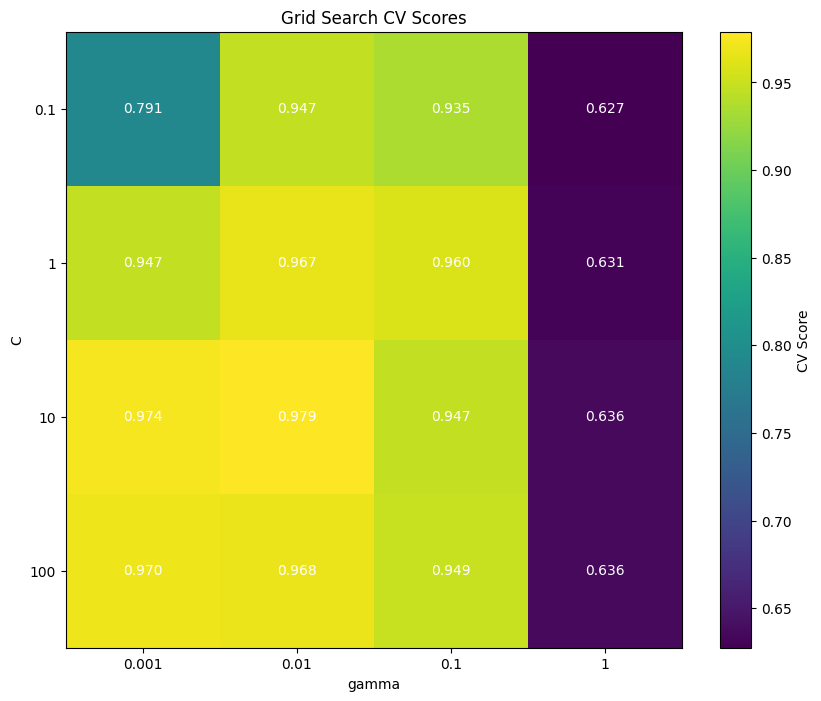


SVM base: 0.974
SVM ottimizzato: 0.979
Miglioramento: 0.53%


In [7]:
# Esercizio 7.3: Ottimizza SVM con Grid Search su C e gamma
# Visualizza la superficie di performance

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Standardizza i dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definisci griglia parametri
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

svm = SVC(kernel='rbf', random_state=42)

# Grid Search
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_scaled, y)

print(f"Miglior score: {grid_search.best_score_:.3f}")
print(f"Migliori parametri: {grid_search.best_params_}")

# Visualizza heatmap dei risultati
scores = grid_search.cv_results_['mean_test_score']
scores = scores.reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.figure(figsize=(10, 8))
plt.imshow(scores, interpolation='nearest', cmap='viridis')
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar(label='CV Score')
plt.xticks(range(len(param_grid['gamma'])), param_grid['gamma'])
plt.yticks(range(len(param_grid['C'])), param_grid['C'])
plt.title('Grid Search CV Scores')

# Aggiungi valori sulle celle
for i in range(len(param_grid['C'])):
    for j in range(len(param_grid['gamma'])):
        plt.text(j, i, f'{scores[i, j]:.3f}', 
                ha='center', va='center', color='white')

plt.show()

# Confronta con modello base
base_svm = SVC(kernel='rbf', random_state=42)
base_scores = cross_val_score(base_svm, X_scaled, y, cv=5)

print(f"\nSVM base: {base_scores.mean():.3f}")
print(f"SVM ottimizzato: {grid_search.best_score_:.3f}")
print(f"Miglioramento: {(grid_search.best_score_ - base_scores.mean()) * 100:.2f}%")

## 8. Progetto Finale: Pipeline Completa

### Esercizio 8.1 (Progetto): Pipeline End-to-End
Crea una pipeline completa che combina tutti i metodi appresi.

In [ ]:
# Esercizio 8.1: PROGETTO FINALE
# Crea una pipeline completa per un problema di classificazione che include:
# 1. Caricamento e esplorazione dati
# 2. Preprocessing (scaling, feature selection)
# 3. Riduzione dimensionalità (PCA)
# 4. Confronto di diversi modelli (SVM, Random Forest, Logistic Regression)
# 5. Ottimizzazione iperparametri del migliore
# 6. Valutazione finale

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Caricamento dati
print("=== STEP 1: Caricamento e Esplorazione Dati ===")
digits = load_digits()
X, y = digits.data, digits.target

print(f"Dataset shape: {X.shape}")
print(f"Numero di classi: {len(np.unique(y))}")
print(f"Distribuzione classi: {np.bincount(y)}")

# 2. Suddivisione dati
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Definisci pipeline completa
print("\n=== STEP 2: Definizione Pipeline ===")
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', SVC())
])

# 4. Confronto modelli base
print("\n=== STEP 3: Confronto Modelli Base ===")
classifiers = {
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

base_results = {}
for name, clf in classifiers.items():
    pipeline.set_params(classifier=clf)
    scores = cross_val_score(pipeline, X, y, cv=5)
    base_results[name] = scores.mean()
    print(f"{name}: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

# 5. Selezione migliore modello
best_base_model = max(base_results, key=base_results.get)
print(f"\nMigliore modello base: {best_base_model}")

# 6. Ottimizzazione pipeline
print("\n=== STEP 4: Ottimizzazione Pipeline ===")
# Imposta il migliore classificatore
pipeline.set_params(classifier=classifiers[best_base_model])

# Definisci parametri da ottimizzare
if best_base_model == 'SVM':
    param_grid = {
        'pca__n_components': [20, 30, 40],
        'classifier__C': [0.1, 1, 10],
        'classifier__gamma': [0.001, 0.01, 0.1]
    }
elif best_base_model == 'Random Forest':
    param_grid = {
        'pca__n_components': [20, 30, 40],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [10, 20, None]
    }
else:  # Logistic Regression
    param_grid = {
        'pca__n_components': [20, 30, 40],
        'classifier__C': [0.1, 1, 10]
    }

# Grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Miglior score CV: {grid_search.best_score_:.3f}")
print(f"Migliori parametri: {grid_search.best_params_}")

# 7. Valutazione finale
print("\n=== STEP 5: Valutazione Finale ===")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matrice di confusione
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice di Confusione - Modello Finale')
plt.ylabel('Vero')
plt.xlabel('Predetto')
plt.show()

print(f"\nAccuracy finale: {(y_pred == y_test).mean():.3f}")
print(f"Miglioramento rispetto al modello base: {(grid_search.best_score_ - base_results[best_base_model]) * 100:.2f}%")

## 9. sklearn.tree: Alberi Decisionali

### Esercizio 9.1 (Base): Visualizzazione Albero Decisionale
Addestra un albero decisionale sul dataset Iris e visualizzalo per interpretarne la logica.


In [ ]:
# Esercizio 9.1: Addestra e visualizza un Decision Tree
# L'obiettivo di questo esercizio è duplice:
# 1. Addestrare un classificatore ad albero decisionale sul famoso dataset Iris.
# 2. Visualizzare la struttura dell'albero per capire come prende le decisioni.
# Per rendere la visualizzazione chiara, limiteremo la profondità dell'albero.
# Infine, analizzeremo l'importanza delle feature per vedere quali sono le più influenti.

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target

# Addestra il classificatore
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)

# Visualizza l'albero
plt.figure(figsize=(20,10))
plot_tree(tree_clf, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          filled=True, 
          rounded=True)
plt.title("Albero Decisionale per il Dataset Iris")
plt.show()

# Analizza feature importance
print("Feature importances:", tree_clf.feature_importances_)



### Esercizio 9.2 (Intermedio): Controllo Overfitting
Analizza l'effetto dell'iperparametro `max_depth` sulle prestazioni di un albero decisionale.


In [ ]:
# Esercizio 9.2: Analizza l'impatto di max_depth
# Questo esercizio dimostra come un albero decisionale può facilmente andare in overfitting
# se la sua profondità non è limitata.
# Addestreremo alberi con diverse profondità massime su un dataset non lineare
# e confronteremo le loro performance sul training set e sul test set.
# Un'alta accuracy sul training set ma bassa sul test set è un chiaro segno di overfitting.

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

depths = [1, 2, 5, 10, None]
train_acc = []
test_acc = []

for depth in depths:
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_clf.fit(X_train, y_train)
    
    train_pred = tree_clf.predict(X_train)
    test_pred = tree_clf.predict(X_test)
    
    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

# Visualizza i risultati
plt.figure(figsize=(10, 6))
plt.plot(depths, train_acc, 'bo-', label='Training Accuracy')
plt.plot(depths, test_acc, 'ro-', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Impatto di max_depth su Overfitting')
plt.legend()
plt.show()



### Esercizio 9.3 (Avanzato): Regressione con Alberi
Usa un `DecisionTreeRegressor` per un problema di regressione non lineare.



In [ ]:
# Esercizio 9.3: Usa DecisionTreeRegressor per un problema di regressione non lineare
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Crea dati non lineari
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

# Addestra regressori con diverse profondità
reg_1 = DecisionTreeRegressor(max_depth=2)
reg_2 = DecisionTreeRegressor(max_depth=5)
reg_1.fit(X, y)
reg_2.fit(X, y)

# Predici
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = reg_1.predict(X_test)
y_2 = reg_2.predict(X_test)

# Visualizza i risultati
plt.figure(figsize=(12, 8))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()



## 10. sklearn.cluster: Algoritmi di Clustering

### Esercizio 10.1 (Base): K-Means Clustering
Applica K-Means per trovare cluster in un dataset e visualizza i risultati.


In [ ]:
# Esercizio 10.1: Applica K-Means e genera un grafico scatter
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Genera dati
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)

# Applica K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Visualizza i cluster e i centroidi
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



### Esercizio 10.2 (Intermedio): Trovare il Numero Ottimale di Cluster
Usa il metodo del gomito (Elbow method) e il Silhouette score per determinare il `k` ottimale.


In [ ]:
# Esercizio 10.2: Trova k ottimale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)

# Metodo del gomito
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Silhouette score
silhouette_scores = []
k_range_sil = range(2, 11)
for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Visualizza i grafici
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(k_range, wcss, 'bo-')
ax1.set_title('Metodo del Gomito (Elbow Method)')
ax1.set_xlabel('Numero di Cluster (k)')
ax1.set_ylabel('WCSS (Inertia)')

ax2.plot(k_range_sil, silhouette_scores, 'ro-')
ax2.set_title('Silhouette Score')
ax2.set_xlabel('Numero di Cluster (k)')
ax2.set_ylabel('Silhouette Score')

plt.show()



### Esercizio 10.3 (Avanzato): Confronto Algoritmi di Clustering
Confronta K-Means, DBSCAN e Agglomerative Clustering su dati non sferici.


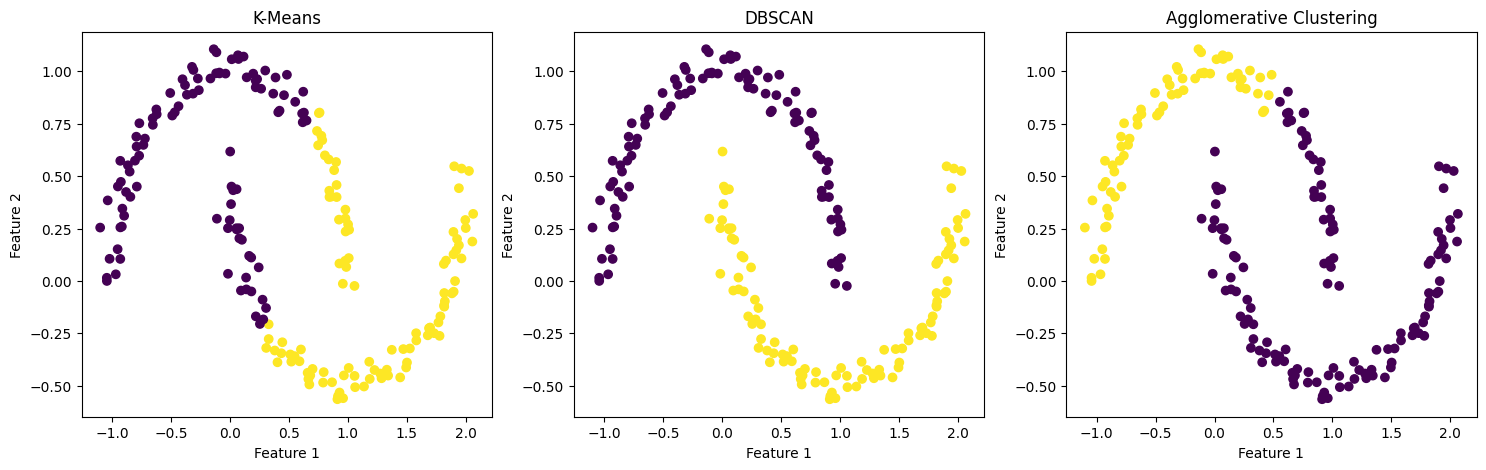

In [8]:
# Esercizio 10.3: Confronta algoritmi di clustering
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200, noise=0.05, random_state=42)

# Algoritmi
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
dbscan = DBSCAN(eps=0.3)
agg_clustering = AgglomerativeClustering(n_clusters=2)

# Predizioni
y_kmeans = kmeans.fit_predict(X)
y_dbscan = dbscan.fit_predict(X)
y_agg = agg_clustering.fit_predict(X)

# Visualizzazione
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
axes[0].set_title('K-Means')
axes[1].scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis')
axes[1].set_title('DBSCAN')
axes[2].scatter(X[:, 0], X[:, 1], c=y_agg, cmap='viridis')
axes[2].set_title('Agglomerative Clustering')

for ax in axes:
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.show()



## 11. sklearn.metrics: Metriche di Valutazione

### Esercizio 11.1 (Base): Report di Classificazione
Calcola le metriche di base (precision, recall, f1-score) per un classificatore.


In [ ]:
# Esercizio 11.1: Usa classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Addestra modello
model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Stampa report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

# Visualizza matrice di confusione
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title('Matrice di Confusione')
plt.show()



### Esercizio 11.2 (Intermedio): Curva ROC e AUC
Traccia la curva ROC e calcola l'area sottesa (AUC) per valutare un classificatore binario.


In [ ]:
# Esercizio 11.2: Traccia la curva ROC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Ottieni probabilità per la classe positiva
y_probs = model.predict_proba(X_test)[:, 1]

# Calcola ROC curve e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Visualizza
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



### Esercizio 11.3 (Avanzato): Scorer Personalizzato
Crea una metrica di valutazione personalizzata e usala in una Grid Search.


In [ ]:
# Esercizio 11.3: Crea uno scorer personalizzato
from sklearn.metrics import make_scorer, f1_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_digits

# Funzione scorer personalizzata che favorisce la precisione
def custom_scorer(y_true, y_pred):
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    # Pondera la precisione il doppio dell'f1-score
    return 0.33 * f1 + 0.67 * precision

# Carica dati
digits = load_digits()
X, y = digits.data, digits.target

# Crea lo scorer per scikit-learn
my_scorer = make_scorer(custom_scorer, greater_is_better=True)

# Usa lo scorer in GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm = SVC(random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring=my_scorer, verbose=1)
grid_search.fit(X, y)

print("Miglior score (custom):", grid_search.best_score_)
print("Migliori parametri:", grid_search.best_params_)



## 12. sklearn.neighbors: Modelli Basati sui Vicini

### Esercizio 12.1 (Base): Classificatore K-NN
Implementa un classificatore K-Nearest Neighbors e testa l'effetto di `k`.


In [ ]:
# Esercizio 12.1: Implementa K-NN
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k_range = range(1, 26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# Visualizza i risultati
plt.figure(figsize=(12, 6))
plt.plot(k_range, scores, 'bo-')
plt.xlabel('Valore di k')
plt.ylabel('Accuracy')
plt.title('Accuracy K-NN al variare di k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

best_k = k_range[scores.index(max(scores))]
print(f"Migliore k: {best_k} con accuracy: {max(scores):.3f}")


### Esercizio 12.2 (Intermedio): Ponderazione dei Vicini
Confronta K-NN con pesi uniformi e pesi basati sulla distanza.


In [ ]:
# Esercizio 12.2: Confronta pesi uniformi e basati sulla distanza
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modello con pesi uniformi
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train, y_train)
acc_uniform = accuracy_score(y_test, knn_uniform.predict(X_test))

# Modello con pesi basati sulla distanza
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train, y_train)
acc_distance = accuracy_score(y_test, knn_distance.predict(X_test))

print(f"Accuracy con pesi 'uniform': {acc_uniform:.3f}")
print(f"Accuracy con pesi 'distance': {acc_distance:.3f}")



### Esercizio 12.3 (Avanzato): Rilevamento Anomalie con K-NN
Usa `NearestNeighbors` per identificare anomalie in un dataset.


In [ ]:
# Esercizio 12.3: Rilevamento anomalie
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Genera dati con alcune anomalie
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

# Calcola la distanza media dal k-esimo vicino
k = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, indices = nbrs.kneighbors(X)
mean_distance = distances.mean(axis=1)

# Definisci una soglia per le anomalie (es. 95° percentile)
threshold = np.percentile(mean_distance, 95)
anomalies = mean_distance > threshold

# Visualizza
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Inliers')
plt.scatter(X[anomalies, 0], X[anomalies, 1], color='red', label='Anomalies')
plt.title('Rilevamento Anomalie con Nearest Neighbors')
plt.legend()
plt.show()

print(f"Numero di anomalie identificate: {np.sum(anomalies)}")



## 13. sklearn.pipeline: Pipeline e Feature Union

### Esercizio 13.1 (Base): Pipeline Semplice
Costruisci una pipeline che scala i dati e poi addestra un classificatore.


In [ ]:
# Esercizio 13.1: Crea una pipeline semplice
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

# Crea la pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])

# Addestra e valuta la pipeline
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy della pipeline: {accuracy:.3f}")
print("Score sul test set:", pipe.score(X_test, y_test))



### Esercizio 13.2 (Intermedio): Pipeline con `ColumnTransformer`
Crea una pipeline che applica trasformazioni diverse a colonne numeriche e categoriche.


In [ ]:
# Esercizio 13.2: Pipeline per dati misti
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Crea un dataset di esempio
data = {
    'age': [25, 30, np.nan, 45, 50],
    'salary': [50000, 60000, 75000, np.nan, 120000],
    'city': ['New York', 'London', 'Paris', 'New York', 'London'],
    'purchased': [0, 1, 0, 1, 1]
}
df = pd.DataFrame(data)
X = df.drop('purchased', axis=1)
y = df['purchased']

# Definisci i preprocessor
numeric_features = ['age', 'salary']
categorical_features = ['city']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Crea la pipeline completa
clf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(random_state=42))])

# Addestra e valuta
clf_pipe.fit(X, y)
print("Score del modello:", clf_pipe.score(X, y))



### Esercizio 13.3 (Avanzato): Ottimizzazione Iperparametri di una Pipeline
Usa `GridSearchCV` per trovare i migliori iperparametri sia per i passi di preprocessing che per il modello finale all'interno di una pipeline.


In [ ]:
# Esercizio 13.3: Ottimizza una pipeline completa
from sklearn.datasets import load_digits
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

digits = load_digits()
X, y = digits.data, digits.target

# Crea la pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svm', SVC(random_state=42))
])

# Definisci la griglia dei parametri
# Nota: i nomi dei parametri sono 'nomepasso__parametro'
param_grid = {
    'pca__n_components': [10, 20, 30],
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf']
}

# Esegui la Grid Search
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X, y)

print("Miglior score CV:", grid_search.best_score_)
print("Migliori parametri:", grid_search.best_params_)